In [1]:
import pandas as pd

In [2]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752


In [3]:
confirmed.shape

(276, 501)

In [4]:
last_date = "5/13/21"
confirmed[last_date]

0       63045
1      131890
2      124889
3       13470
4       29695
        ...  
271      3740
272    303270
273      6507
274     92262
275     38491
Name: 5/13/21, Length: 276, dtype: int64

In [5]:
# valor falso pois o erro é muito grande
# não vou considerar essa análise pois tem muito campo vazio (muita disparidade no padrão)

confirmed['Country/Region'].value_counts()

China             34
Canada            16
United Kingdom    12
France            12
Australia          8
                  ..
Libya              1
Italy              1
Ecuador            1
Mongolia           1
Romania            1
Name: Country/Region, Length: 193, dtype: int64

In [6]:
confirmed_by_country = confirmed.groupby('Country/Region').sum()
confirmed_by_country.head(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752
Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,0,0,...,1257,1258,1258,1258,1258,1259,1259,1259,1260,1260
Argentina,-38.41610,-63.616700,0,0,0,0,0,0,0,0,...,3539484,3562135,3586736,3622135,3663215,3702422,3732263,3753609,3781784,3817139
Armenia,40.06910,45.038200,0,0,0,0,0,0,0,0,...,221948,221982,222139,222269,222409,222513,222555,222636,222670,222778
Australia,-256.85020,1130.843900,0,0,0,0,4,5,5,6,...,30019,30029,30046,30063,30074,30083,30096,30105,30118,30124


In [7]:
country = 'China'

In [8]:
confirmed_by_country.loc[country][2:]

1/22/20       548.0
1/23/20       643.0
1/24/20       920.0
1/25/20      1406.0
1/26/20      2075.0
             ...   
5/28/21    102948.0
5/29/21    102960.0
5/30/21    102987.0
5/31/21    103014.0
6/1/21     103045.0
Name: China, Length: 497, dtype: float64

In [9]:
import matplotlib.pyplot as plt

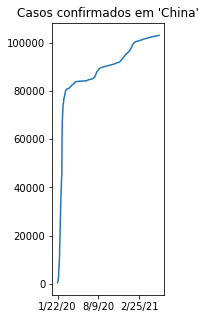

In [10]:
# grafico extremamente apertado, estamos sendo longe do adequado em passar uma mensagem errada

plt.figure(figsize=(2,5))
confirmed_by_country.loc[country][2:].plot()
plt.title("Casos confirmados em 'China'")
plt.show()

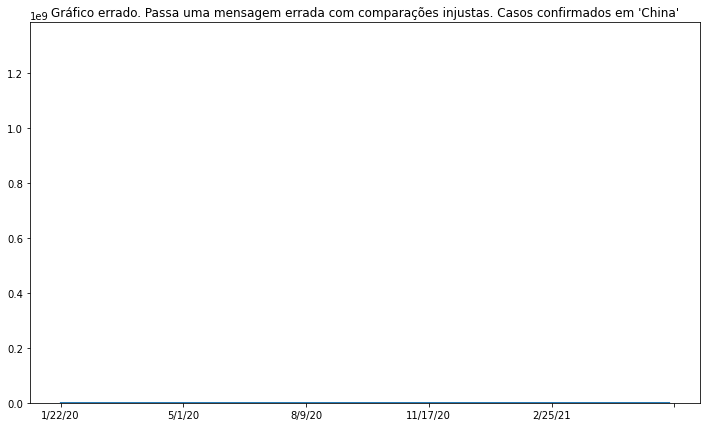

In [11]:
# comparando o momento inicial com 1.386 bi (população da China 2017)

plt.figure(figsize=(12,7))
confirmed_by_country.loc[country][2:].plot()
plt.title("Gráfico errado. Passa uma mensagem errada com comparações injustas. Casos confirmados em 'China'")
plt.ylim(0, 1386000000)
plt.show()

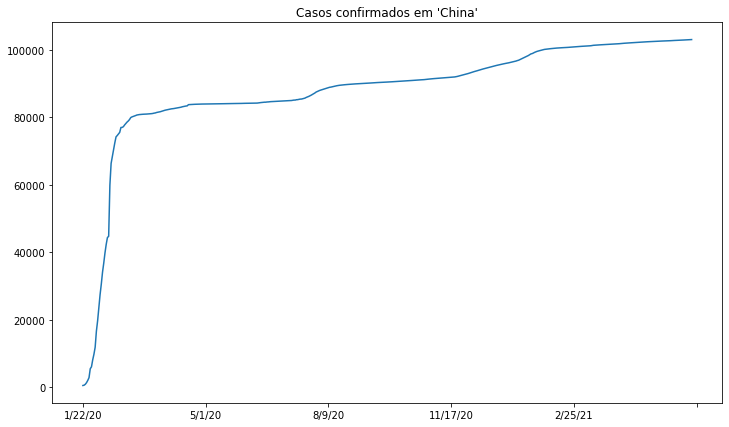

In [12]:
# tentando comparar o crescimento do momento inicial ao momento atual

plt.figure(figsize=(12,7))
confirmed_by_country.loc[country][2:].plot()
plt.title("Casos confirmados em 'China'")
plt.show()

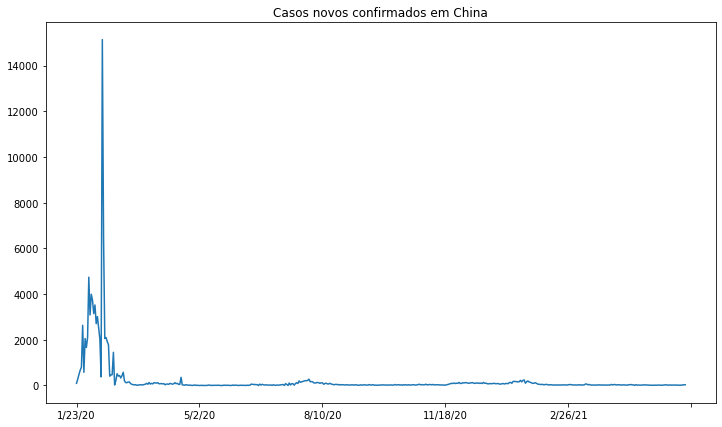

In [13]:
new_cases_country = confirmed_by_country.loc[country][2:].diff().dropna()

plt.figure(figsize=(12,7))
plt.title(f'Casos novos confirmados em {country}')
new_cases_country.plot()
plt.show()

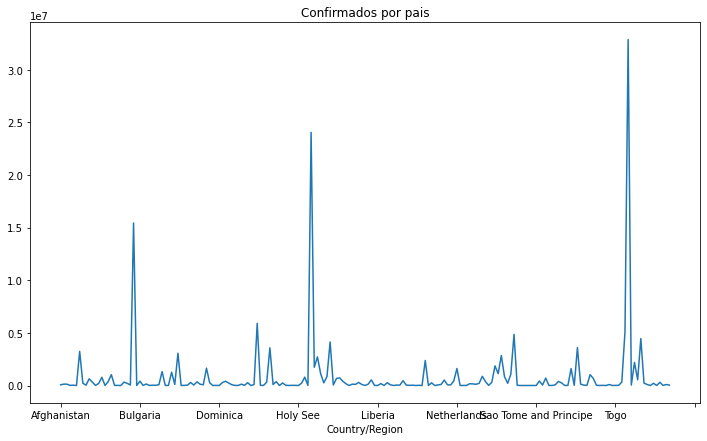

In [14]:
plt.figure(figsize=(12,7))
confirmed_by_country[last_date].plot()
plt.title('Confirmados por pais')
plt.show()

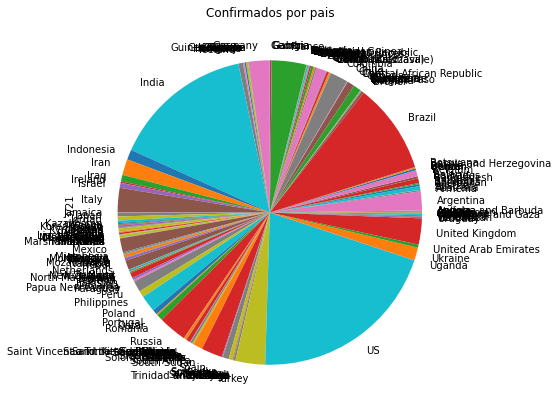

In [15]:
# 99,99% das vezes não devemos usar gráfico de pizza

# 1- Muitas categorias, inviável
# 2- Poucas categorias, a comparação é de área!

plt.figure(figsize=(12,7))
confirmed_by_country[last_date].plot(kind='pie')
plt.title('Confirmados por pais')
plt.show()

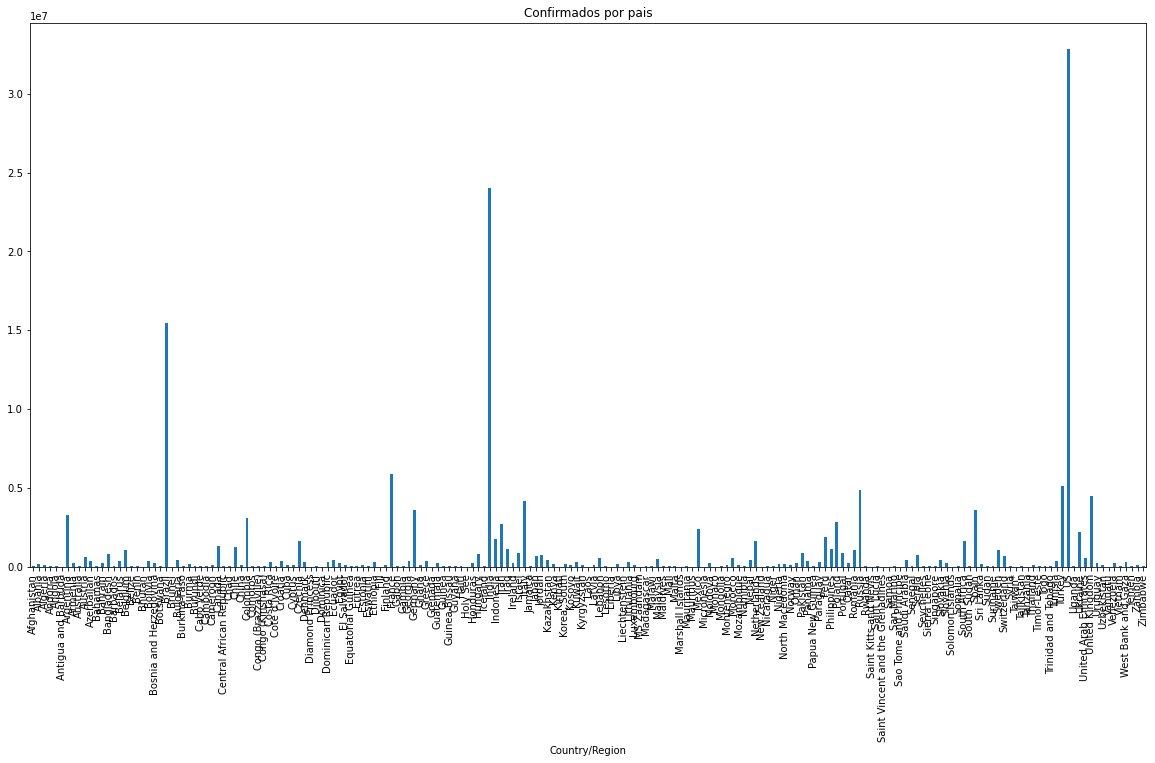

In [16]:
plt.figure(figsize=(20,10))
confirmed_by_country[last_date].plot(kind='bar')
plt.title('Confirmados por pais')
plt.show()

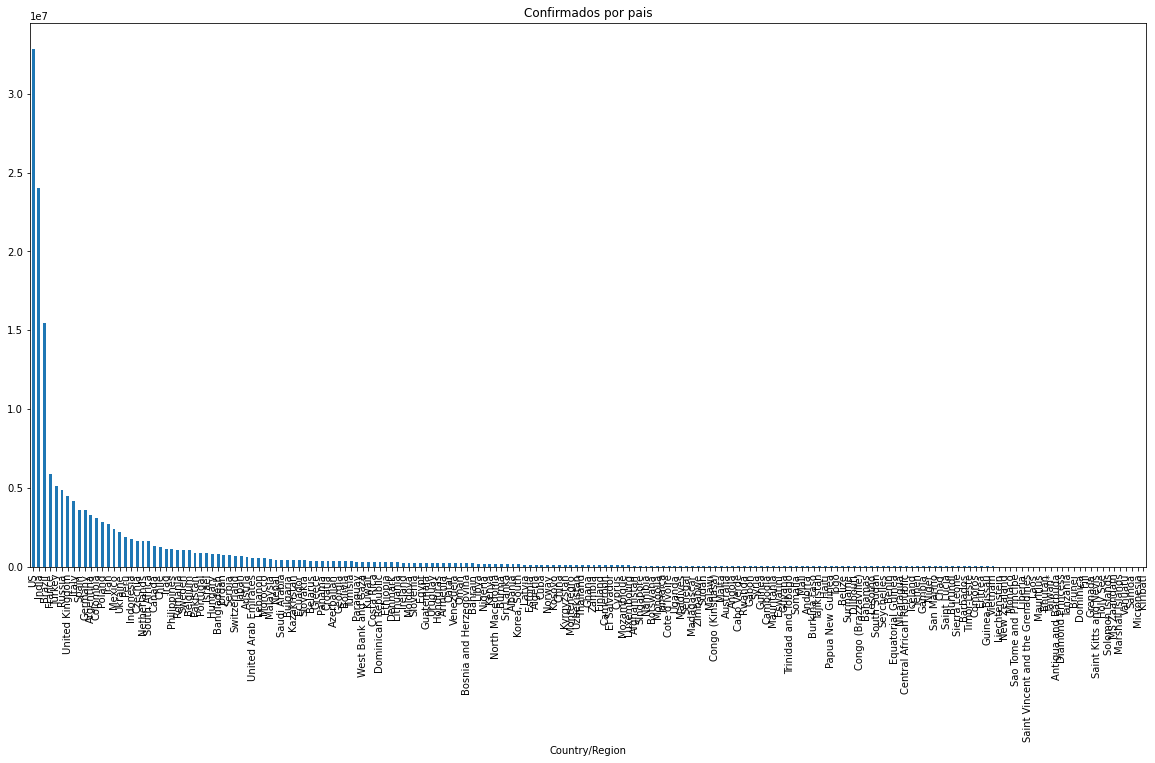

In [17]:
plt.figure(figsize=(20,10))
confirmed_by_country[last_date].sort_values(ascending=False).plot(kind='bar')
plt.title('Confirmados por pais')
plt.show()

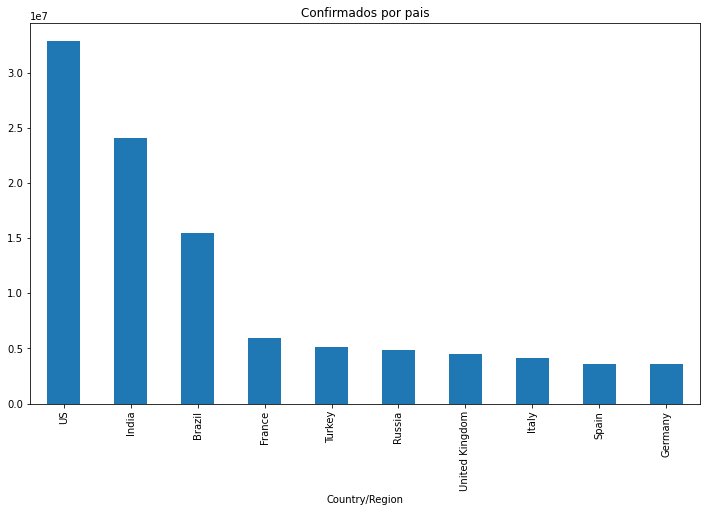

In [18]:
plt.figure(figsize=(12,7))
confirmed_by_country[last_date].sort_values(ascending=False)[0:10].plot(kind='bar')
plt.title('Confirmados por pais')
plt.show()

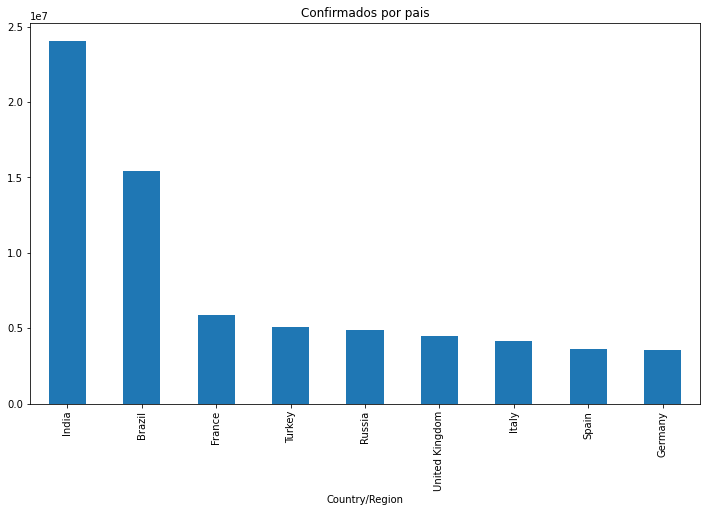

In [19]:
plt.figure(figsize=(12,7))
confirmed_by_country[last_date].sort_values(ascending=False)[1:10].plot(kind='bar')
plt.title('Confirmados por pais')
plt.show()

In [20]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

display(deaths.head())
display(recovered.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2802,2812,2836,2855,2869,2881,2899,2919,2944,2973
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2444,2445,2447,2447,2447,2448,2449,2450,2451,2451
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3418,3426,3433,3440,3448,3455,3460,3465,3472,3480
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,725,731,735,742,745,749,757,764,766,772


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,56035,56295,56518,56711,56962,57119,57281,57450,57629,57741
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,128732,128826,128907,128978,129042,129097,129215,129308,129431,129473
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,88346,88497,88672,88861,89040,89232,89419,89625,89839,90057
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13234,13234,13263,13381,13405,13416,13416,13416,13458,13479
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,26778,27087,27204,27467,27529,27577,27646,27766,28079,28190


In [21]:
def latest_by_country(data):
    return data.groupby('Country/Region').sum().iloc[:,-1]

def latest_by_country_at(data, date):
    return data.groupby('Country/Region').sum()[date]

In [22]:
informations = [latest_by_country(confirmed), latest_by_country(deaths), latest_by_country(recovered)]
combined = pd.concat(informations, axis=1)
combined.columns = ['Confirmados', 'Mortos', 'Recuperados']
combined

,Confirmados,Mortos,Recuperados
Country/Region,,,
Afghanistan,72977,2973,57741
Albania,132337,2451,129473
Algeria,129218,3480,90057
Andorra,13729,127,13479
Angola,34752,772,28190
...,...,...,...
Vietnam,7625,48,3043
West Bank and Gaza,308732,3503,300919
Yemen,6751,1322,3472


In [23]:
informations = [latest_by_country_at(confirmed, '2/20/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_2_20_20 = pd.concat(informations, axis=1)
combined_2_20_20.columns = ['Confirmados', 'Mortos', 'Recuperados']
combined_2_20_20

,Confirmados,Mortos,Recuperados
Country/Region,,,
Afghanistan,0,0,0
Albania,0,0,0
Algeria,0,0,0
Andorra,0,0,0
Angola,0,0,0
...,...,...,...
Vietnam,16,0,7
West Bank and Gaza,0,0,0
Yemen,0,0,0


In [24]:
# taxa de letalidade expressa em %
# número de casos letais dentro dos casos que foram letais e não letais

sum_up = combined.sum()
taxa_letalidade_1 = sum_up['Mortos'] / sum_up['Confirmados']
taxa_letalidade_2 = sum_up['Mortos'] / (sum_up['Recuperados'] + sum_up['Mortos'])
print(f"No conjunto de dados que estamos utilizando a taxa de letalidade 1 é {(taxa_letalidade_1 * 100):.2f}%")
print(f"No conjunto de dados que estamos utilizando a taxa de letalidade 2 é {(taxa_letalidade_2 * 100):.2f}%")

No conjunto de dados que estamos utilizando a taxa de letalidade 1 é 2.08%
No conjunto de dados que estamos utilizando a taxa de letalidade 2 é 3.17%


In [25]:
sum_up = combined_2_20_20.sum()
taxa_letalidade_1 = sum_up['Mortos'] / sum_up['Confirmados']
taxa_letalidade_2 = sum_up['Mortos'] / (sum_up['Recuperados'] + sum_up['Mortos'])
print(f"No conjunto de dados que estamos utilizando a taxa de letalidade 1 é {(taxa_letalidade_1 * 100):.2f}%")
print(f"No conjunto de dados que estamos utilizando a taxa de letalidade 2 é {(taxa_letalidade_2 * 100):.2f}%")

No conjunto de dados que estamos utilizando a taxa de letalidade 1 é 2.95%
No conjunto de dados que estamos utilizando a taxa de letalidade 2 é 11.01%


In [26]:
informations = [latest_by_country_at(confirmed, '2/8/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_12 = pd.concat(informations, axis=1)
combined_12.columns = ['Confirmados', 'Mortos', 'Recuperados']

sum_up = combined_12.sum()
taxa_letalidade_1 = sum_up['Mortos'] / sum_up['Confirmados']
print(f"No conjunto de dados que estamos utilizando a taxa de letalidade 1 é {(taxa_letalidade_1 * 100):.2f}%")

No conjunto de dados que estamos utilizando a taxa de letalidade 1 é 6.05%


In [27]:
taxa_letalidade_1 = (combined['Mortos'] / combined['Confirmados']) * 100
taxa_letalidade_2 = (combined['Mortos'] / (combined['Recuperados'] + combined['Mortos'])) * 100
combined['taxa_letalidade_1'] = taxa_letalidade_1
combined['taxa_letalidade_2'] = taxa_letalidade_2
combined.head(10)

,Confirmados,Mortos,Recuperados,taxa_letalidade_1,taxa_letalidade_2
Country/Region,,,,,
Afghanistan,72977,2973,57741,4.073886,4.896729
Albania,132337,2451,129473,1.852090,1.857888
Algeria,129218,3480,90057,2.693123,3.720453
Andorra,13729,127,13479,0.925049,0.933412
Angola,34752,772,28190,2.221455,2.665562
Antigua and Barbuda,1260,42,1213,3.333333,3.346614
Argentina,3817139,78733,3381337,2.062618,2.275474
Armenia,222778,4445,213429,1.995260,2.040170
Australia,30124,910,23584,3.020847,3.715196


In [28]:
combined.sort_values('taxa_letalidade_1', ascending=False).head(10)

,Confirmados,Mortos,Recuperados,taxa_letalidade_1,taxa_letalidade_2
Country/Region,,,,,
Vanuatu,4,1,3,25.000000,25.000000
MS Zaandam,9,2,7,22.222222,22.222222
Yemen,6751,1322,3472,19.582284,27.576137
Mexico,2420659,227840,1930608,9.412313,10.555733
Sudan,35512,2662,29364,7.496058,8.311997
Syria,24529,1774,21609,7.232256,7.586708
Egypt,263606,15136,192823,5.741903,7.278358
Somalia,14667,769,6764,5.243063,10.208416
Ecuador,427690,20620,375151,4.821249,5.210084


In [29]:
combined.sort_values('taxa_letalidade_2', ascending=False).head(10)

,Confirmados,Mortos,Recuperados,taxa_letalidade_1,taxa_letalidade_2
Country/Region,,,,,
Belgium,1063499,24968,0,2.347722,100.000000
US,33290450,595223,0,1.787969,100.000000
Sweden,1068473,14451,0,1.352491,100.000000
Serbia,712702,6872,0,0.964218,100.000000
United Kingdom,4506333,128045,15508,2.841446,89.197021
Netherlands,1679093,17906,26881,1.066409,39.980351
Spain,3682778,79983,150376,2.171812,34.721022
Yemen,6751,1322,3472,19.582284,27.576137
Vanuatu,4,1,3,25.000000,25.000000


<Figure size 864x504 with 0 Axes>

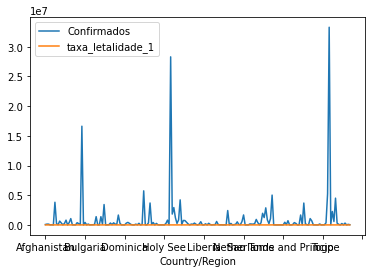

In [30]:
# Visualização horenda
plt.figure(figsize=(12,7))
combined[['Confirmados', 'taxa_letalidade_1']].plot()
plt.show()

In [31]:
import seaborn as sns

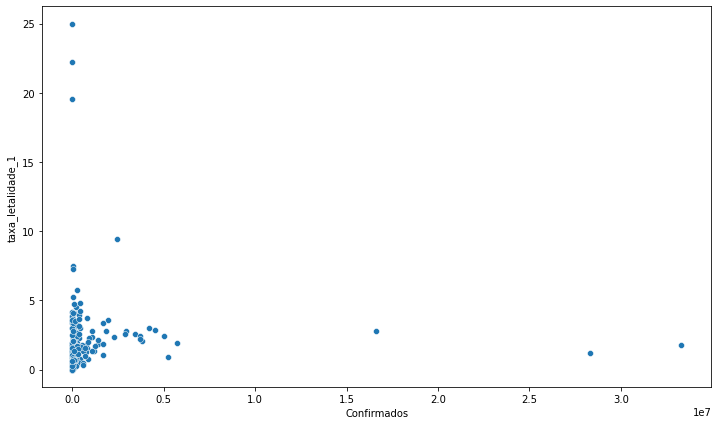

In [32]:
plt.figure(figsize=(12,7))
sns.scatterplot(data = combined, x='Confirmados', y='taxa_letalidade_1')
plt.show()

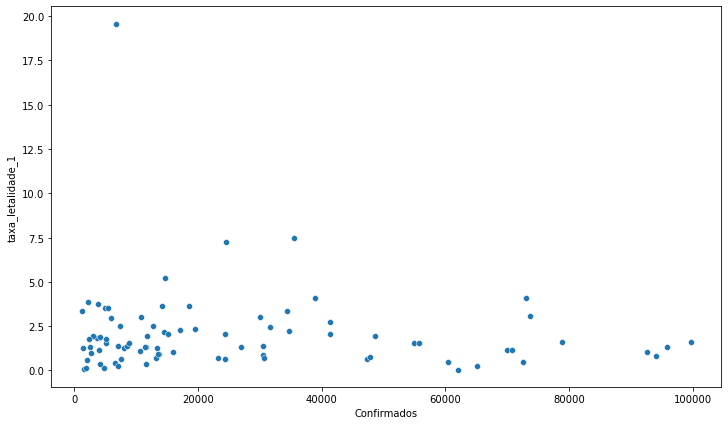

In [33]:
plt.figure(figsize=(12,7))
sns.scatterplot(data = combined.query('Confirmados > 1000 and Confirmados < 100000'), x='Confirmados', y='taxa_letalidade_1')
plt.show()

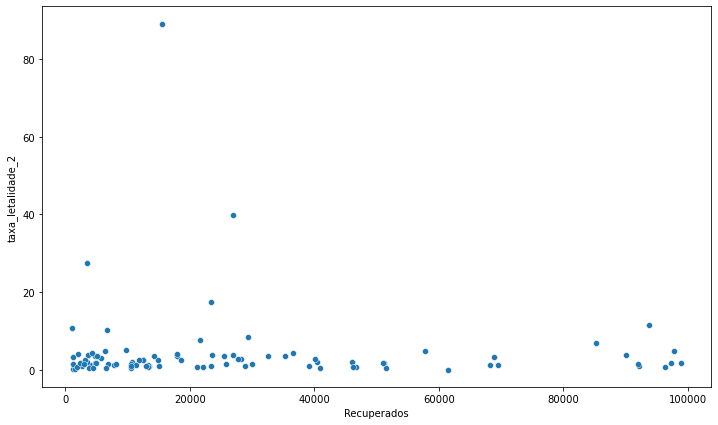

In [34]:
plt.figure(figsize=(12,7))
sns.scatterplot(data = combined.query('Recuperados > 1000 and Recuperados < 100000'), x='Recuperados', y='taxa_letalidade_2')
plt.show()

/home/edcarlos/anaconda3/envs/data_science/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


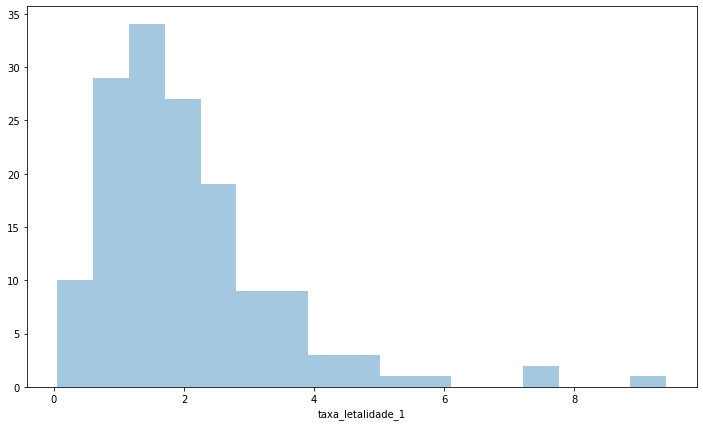

In [35]:
plt.figure(figsize=(12,7))
sns.distplot(combined.query('Confirmados > 10000')['taxa_letalidade_1'], kde=False)
plt.show()

/home/edcarlos/anaconda3/envs/data_science/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


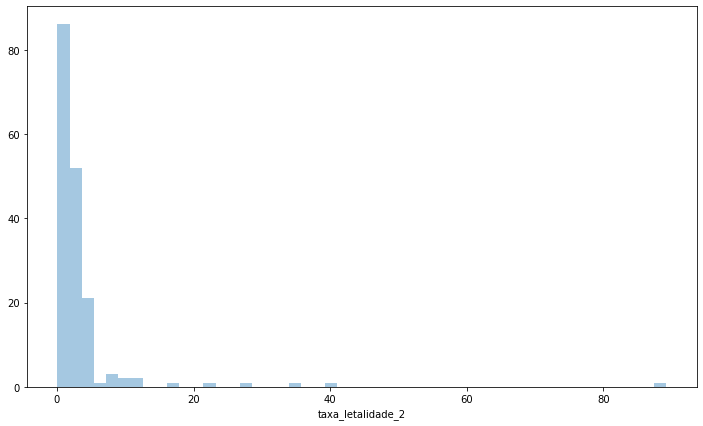

In [36]:
plt.figure(figsize=(12,7))
sns.distplot(combined.query('Recuperados > 1000')['taxa_letalidade_2'], kde=False)
plt.show()

In [37]:
combined.sort_values('taxa_letalidade_1', ascending=False).query('Confirmados > 10000').head(10)

,Confirmados,Mortos,Recuperados,taxa_letalidade_1,taxa_letalidade_2
Country/Region,,,,,
Mexico,2420659,227840,1930608,9.412313,10.555733
Sudan,35512,2662,29364,7.496058,8.311997
Syria,24529,1774,21609,7.232256,7.586708
Egypt,263606,15136,192823,5.741903,7.278358
Somalia,14667,769,6764,5.243063,10.208416
Ecuador,427690,20620,375151,4.821249,5.210084
China,103045,4846,97788,4.702800,4.721632
Bosnia and Herzegovina,204093,9270,175456,4.542047,5.018243
Bulgaria,418813,17726,383765,4.232438,4.415043


In [38]:
combined.sort_values('taxa_letalidade_2', ascending=False).query('Recuperados > 1000').head(10)

,Confirmados,Mortos,Recuperados,taxa_letalidade_1,taxa_letalidade_2
Country/Region,,,,,
United Kingdom,4506333,128045,15508,2.841446,89.197021
Netherlands,1679093,17906,26881,1.066409,39.980351
Spain,3682778,79983,150376,2.171812,34.721022
Yemen,6751,1322,3472,19.582284,27.576137
France,5738641,109824,392593,1.913763,21.859133
Ireland,254870,4941,23364,1.938635,17.456280
Greece,404163,12122,93764,2.999285,11.448161
Taiwan*,8842,137,1133,1.549423,10.787402
Mexico,2420659,227840,1930608,9.412313,10.555733


# Segunda parte

In [39]:
confirmed.set_index('Country/Region').loc['China'].sum().tail()

5/28/21    102948
5/29/21    102960
5/30/21    102987
5/31/21    103014
6/1/21     103045
dtype: object

In [40]:
is_china = confirmed['Country/Region'] == 'China'

In [41]:
confirmed['is_china'] = is_china
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,is_china
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,66275,66903,67743,68366,69130,70111,70761,71838,72977,False
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132215,132229,132244,132264,132285,132297,132309,132315,132337,False
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,127107,127361,127646,127926,128198,128456,128725,128913,129218,False
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13664,13671,13682,13693,13693,13693,13727,13729,False
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,32623,32933,33338,33607,33944,34180,34366,34551,34752,False


In [42]:
confirmed.query('is_china').head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,is_china
58,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,1004,1004,1004,1004,1004,1004,1004,1004,1004,True
59,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,1058,1058,1059,1059,1059,1059,1059,1059,1059,True
60,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,598,598,598,598,598,598,598,598,598,True
61,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,615,616,617,617,618,620,621,621,624,True
62,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,194,194,194,194,194,194,194,194,194,True


In [43]:
confirmed.groupby('is_china').sum()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21
is_china,,,,,,,,,,,,,,,,,,,,,
False,4517.33885,2429.011414,9,12,21,27,43,50,69,80,...,166762609,167216786,167748599,168316715,168871005,169370813,169851659,170242690,170621198,171084555
True,1085.29230,3688.937700,548,643,920,1406,2075,2877,5509,6087,...,102873,102890,102905,102925,102932,102948,102960,102987,103014,103045


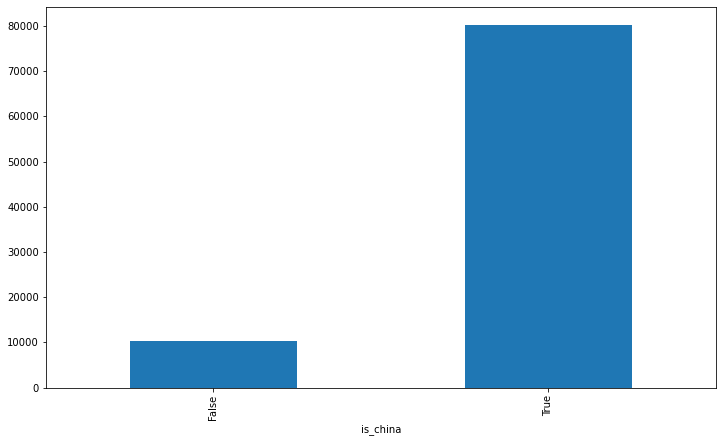

In [44]:
plt.figure(figsize=(12,7))
confirmed.groupby('is_china').sum()['3/2/20'].plot(kind='bar')
plt.show()

### No dia 02/03/2020 China teve 8 vezes o número de casos que o resto. Mas isso é até injusto pois estamos resumindo as informações, e com isso perdendo elas.

Mas olhar uma fotografia é muito limitado, queremos ver também como anda esse crescimento

In [45]:
import numpy as np

In [46]:
confirmed['is_china_label'] = np.where(confirmed['is_china'], 'China', 'Others')
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,is_china,is_china_label
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,66903,67743,68366,69130,70111,70761,71838,72977,False,Others
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132229,132244,132264,132285,132297,132309,132315,132337,False,Others
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,127361,127646,127926,128198,128456,128725,128913,129218,False,Others
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13664,13671,13682,13693,13693,13693,13727,13729,False,Others
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,32933,33338,33607,33944,34180,34366,34551,34752,False,Others


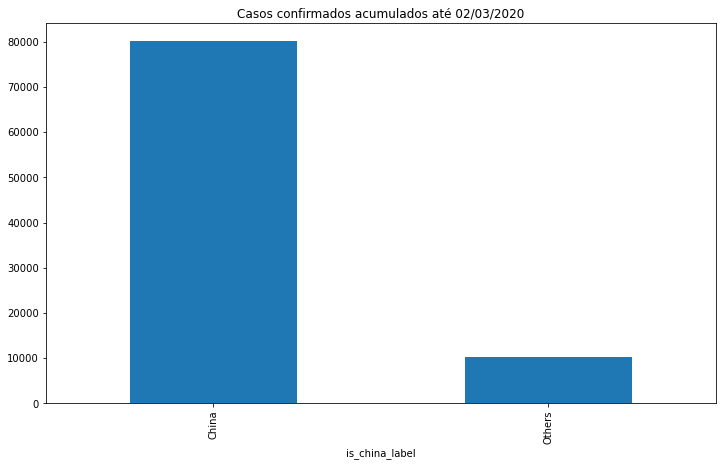

In [47]:
plt.figure(figsize=(12,7))
confirmed.groupby('is_china_label').sum()['3/2/20'].plot(kind='bar')
plt.title("Casos confirmados acumulados até 02/03/2020")
plt.show()

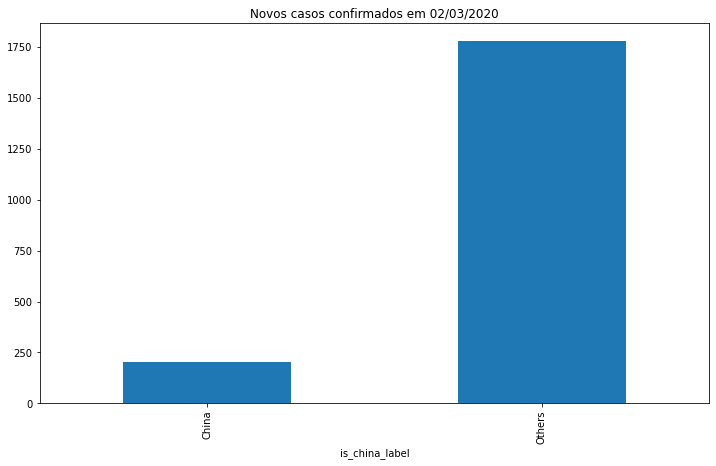

In [48]:
plt.figure(figsize=(12,7))
summed = confirmed.groupby('is_china_label').sum()
summed['delta'] = summed['3/2/20'] - summed['3/1/20']
summed['delta'].plot(kind='bar')

plt.title("Novos casos confirmados em 02/03/2020")
plt.show()

<Figure size 864x504 with 0 Axes>

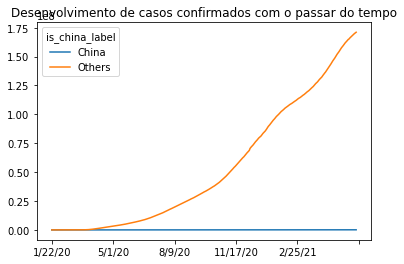

In [49]:
plt.figure(figsize=(12,7))
summed.T[2:-2].plot()
plt.title('Desenvolvimento de casos confirmados com o passar do tempo')
plt.show()

<Figure size 864x504 with 0 Axes>

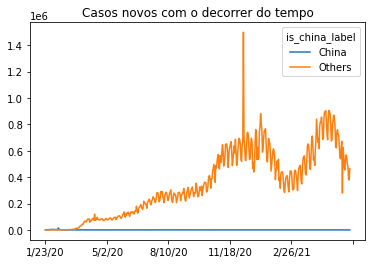

In [50]:
plt.figure(figsize=(12,7))
differences = summed.T[2:-2].diff().dropna()
differences.plot()
plt.title('Casos novos com o decorrer do tempo')
plt.show()

In [51]:
cases = confirmed.groupby('is_china_label').sum()['3/2/20'].loc['China']
estimated_population = 1437525528
incidence_ratio = cases / estimated_population * 100000
incidence_ratio

# conta péssima, ruim e errada, pois estou usando um população muito maior do que deveria estar usando

5.574579264097771

In [52]:
un_population = pd.read_csv("https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv")
un_population['PopTotal'] = un_population['PopTotal'] * 1000
un_population.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752117.0,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840151.0,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935996.0,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039684.0,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151316.0,12.486


In [53]:
un_population_total = un_population.query('Time==2019')[['Location', 'PopTotal']].set_index('Location')
un_population_total.head()

,PopTotal
Location,
Afghanistan,3.804176e+07
Africa,1.308064e+09
African Group,1.306321e+09
African Union,1.306903e+09
African Union: Central Africa,1.540137e+08


In [54]:
combined.join(un_population_total).sort_values('Confirmados', ascending=False)

,Confirmados,Mortos,Recuperados,taxa_letalidade_1,taxa_letalidade_2,PopTotal
US,33290450,595223,0,1.787969,100.000000,NaN
India,28307832,335102,26179085,1.183778,1.263859,1.366418e+09
Brazil,16624480,465199,14694950,2.798277,3.068565,2.110495e+08
France,5738641,109824,392593,1.913763,21.859133,6.512973e+07
Turkey,5256516,47656,5124081,0.906608,0.921470,8.342961e+07
...,...,...,...,...,...,...
Vanuatu,4,1,3,25.000000,25.000000,2.998820e+05
Marshall Islands,4,0,4,0.000000,0.000000,5.879100e+04
Samoa,3,0,3,0.000000,0.000000,1.970930e+05
Kiribati,2,0,0,0.000000,NaN,1.176080e+05


In [55]:
combined.join(un_population_total).sort_values('Confirmados', ascending=False).loc['China']

Confirmados          1.030450e+05
Mortos               4.846000e+03
Recuperados          9.778800e+04
taxa_letalidade_1    4.702800e+00
taxa_letalidade_2    4.721632e+00
PopTotal             1.433784e+09
Name: China, dtype: float64

In [56]:
un_population_total.index[:5]

Index(['Afghanistan', 'Africa', 'African Group', 'African Union',
       'African Union: Central Africa'],
      dtype='object', name='Location')

In [57]:
un_population.query("Location.str.contains('China') and Time==2019")

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
47893,156,China,2,Medium,2019,2019.5,735624.259,698159.433,1.433784e+09,152.722
48777,1105,China (and dependencies),2,Medium,2019,2019.5,751174.575,714459.601,1.465634e+09,155.510
48928,344,"China, Hong Kong SAR",2,Medium,2019,2019.5,3418.487,4017.670,7.436157e+06,7082.054
49812,446,"China, Macao SAR",2,Medium,2019,2019.5,307.706,332.740,6.404460e+05,21419.599
50696,158,"China, Taiwan Province of China",2,Medium,2019,2019.5,11824.123,11949.758,2.377388e+07,671.389
140008,948,"Less developed regions, excluding China",2,Medium,2019,2019.5,2518843.362,2458360.347,4.977204e+09,69.541
208293,2093,"SIDS Atlantic, and Indian Ocean, Mediterranean...",2,Medium,2019,2019.5,8421.200,7569.584,1.599078e+07,37.205


In [58]:
# Estou assumindo que na UN China = John Hokpins China

In [59]:
combined_expanded = combined.join(un_population_total).sort_values('Confirmados', ascending=False).dropna()
combined_expanded.head(10)

,Confirmados,Mortos,Recuperados,taxa_letalidade_1,taxa_letalidade_2,PopTotal
India,28307832,335102,26179085,1.183778,1.263859,1.366418e+09
Brazil,16624480,465199,14694950,2.798277,3.068565,2.110495e+08
France,5738641,109824,392593,1.913763,21.859133,6.512973e+07
Turkey,5256516,47656,5124081,0.906608,0.921470,8.342961e+07
United Kingdom,4506333,128045,15508,2.841446,89.197021,6.753016e+07
Italy,4220304,126221,3868332,2.990804,3.159828,6.055009e+07
Argentina,3817139,78733,3381337,2.062618,2.275474,4.478068e+07
Germany,3692908,88781,3509660,2.404095,2.467207,8.351705e+07
Spain,3682778,79983,150376,2.171812,34.721022,4.673678e+07
Colombia,3432422,89297,3193406,2.601574,2.720228,5.033944e+07


In [60]:
combined_expanded['incidence_ratio'] = combined_expanded['Confirmados'] / combined_expanded['PopTotal'] * 100000
combined_expanded['motality_rate'] = combined_expanded['Mortos'] / combined_expanded['PopTotal'] * 100000
combined_expanded.head(10)

,Confirmados,Mortos,Recuperados,taxa_letalidade_1,taxa_letalidade_2,PopTotal,incidence_ratio,motality_rate
India,28307832,335102,26179085,1.183778,1.263859,1.366418e+09,2071.682095,24.524125
Brazil,16624480,465199,14694950,2.798277,3.068565,2.110495e+08,7877.051831,220.421730
France,5738641,109824,392593,1.913763,21.859133,6.512973e+07,8811.092740,168.623451
Turkey,5256516,47656,5124081,0.906608,0.921470,8.342961e+07,6300.540287,57.121209
United Kingdom,4506333,128045,15508,2.841446,89.197021,6.753016e+07,6673.067165,189.611572
Italy,4220304,126221,3868332,2.990804,3.159828,6.055009e+07,6969.938212,208.457156
Argentina,3817139,78733,3381337,2.062618,2.275474,4.478068e+07,8524.076513,175.819145
Germany,3692908,88781,3509660,2.404095,2.467207,8.351705e+07,4421.741641,106.302850
Spain,3682778,79983,150376,2.171812,34.721022,4.673678e+07,7879.827927,171.135017
Colombia,3432422,89297,3193406,2.601574,2.720228,5.033944e+07,6818.553793,177.389726


Comparação com o vírus da influenza, em outro país, estado, período e tamanho de período

Fonte: https://www.cevs.rs.gov.br/informativos-epidemiologicos-2019

> O coeficiente de incidênciaentre os SRAG, está em 3,88/100.000habitantes,o coeficiente de mortalidade(CM)está em 0,61/100.000 habitantes, enquanto que oCMnacional, na SE46 foi de 0,50/100.000habitantes.A letalidade no Estado está em 15,8%.

In [61]:
confirmed.sort_values(last_date, ascending=False).head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,is_china,is_china_label
251,NaN,US,40.000000,-100.00000,1,1,2,2,5,5,...,33169715,33193687,33221141,33242999,33254998,33261731,33267507,33290450,False,Others
147,NaN,India,20.593684,78.96288,0,0,0,0,0,0,...,27157795,27369093,27555457,27729247,27894800,28047534,28175044,28307832,False,Others
30,NaN,Brazil,-14.235000,-51.92530,0,0,0,0,0,0,...,16194209,16274695,16342162,16391930,16471600,16515120,16545554,16624480,False,Others
130,NaN,France,46.227600,2.21370,0,0,2,3,3,3,...,5552977,5564217,5578150,5588981,5600353,5608347,5609558,5619133,False,Others
250,NaN,Turkey,38.963700,35.24330,0,0,0,0,0,0,...,5203385,5212123,5220549,5228322,5235978,5242911,5249404,5256516,False,Others


In [62]:
confirmed.sort_values(last_date, ascending=False)[confirmed.sort_values(last_date, ascending=False)["Province/State"] == 'Hubei']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,is_china,is_china_label
71,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,68159,68159,68159,68159,68159,68159,68159,68159,True,China


In [63]:
last_date = '6/1/21'

In [64]:
confirmed_cases = confirmed.set_index('Province/State').loc['Hubei'][last_date]
death_cases = deaths.set_index('Province/State').loc['Hubei'][last_date]
recovered_cases = recovered.set_index('Province/State').loc['Hubei'][last_date]
hubei_population = 59020000

letality_rate_1 = death_cases / confirmed_cases * 100
letality_rate_2 = death_cases / (death_cases + recovered_cases) * 100
print(f"Letality rate 1: {letality_rate_1}%")
print(f"Letality rate 2: {letality_rate_2}%")

Letality rate 1: 6.6198154315644295%
Letality rate 2: 6.619912556119605%


In [65]:
# nos estados unidos de acordo com burden report de influenze 2018-2019 estimativa não final
letality_rate_hospitalization =  34157 / 490561 * 100
print(f"Letality rate hospitalização nos EUA influenza 2018-2019: {letality_rate_hospitalization}%")

Letality rate hospitalização nos EUA influenza 2018-2019: 6.962844579980879%


In [66]:
# nos estados unidos de acordo com burden report de influenze 2018-2019 estimativa não final
letality_rate_medical_visit =  34157 / 16520350 * 100
print(f"Letality rate com visita médica nos EUA influenza 2018-2019: {letality_rate_medical_visit}%")

Letality rate com visita médica nos EUA influenza 2018-2019: 0.20675712076317995%


In [67]:
# nos estados unidos de acordo com burden report de influenze 2018-2019 estimativa não final
letality_rate_symptomatic =  34157 / 35520883 * 100
print(f"Letality rate sintomáticos nos EUA influenza 2018-2019: {letality_rate_symptomatic}%")

Letality rate sintomáticos nos EUA influenza 2018-2019: 0.09616033475293956%


In [68]:
incidence_ratio = confirmed_cases / hubei_population * 100000
mortality_rate = death_cases / hubei_population * 100000

print(f"Coeficiência de incidência em Hubei: {incidence_ratio}$")
print(f"Coeficiência de mortalidade em Hubei: {mortality_rate}$")

Coeficiência de incidência em Hubei: 115.48458149779736$
Coeficiência de mortalidade em Hubei: 7.64486614706879$


In [69]:
# Estados Unidos, mesmo relatório de burden, coeficiente de incidência

incidence_ratio = 35520883 / 329450000 * 100000
mortality_rate = 34157 / 329450000 * 100000

print(f"Coeficiência de incidência de influenza 2018-2019 em EUA: {incidence_ratio}$")
print(f"Coeficiência de mortalidade de influenza 2018-2019 em EUA: {mortality_rate}$")

Coeficiência de incidência de influenza 2018-2019 em EUA: 10781.873728942177$
Coeficiência de mortalidade de influenza 2018-2019 em EUA: 10.367885870390044$


### Muito ruim e difícil fazer comparação com período de tempo diferente (2 meses / 12 meses). Você quer extrapolar simplesmente e multiplicar por 6? 24 a mortalidade. Mas extrapolar com esse tipo de crescimento pode ser muito irreal. Então infelizmente tem que ir por estimativas... estatística.